In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy 
import pandas as pd


df=pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [2]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
df[df.duplicated()].shape

(8, 31)

In [5]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

C:\Users\Sandy_Marcus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


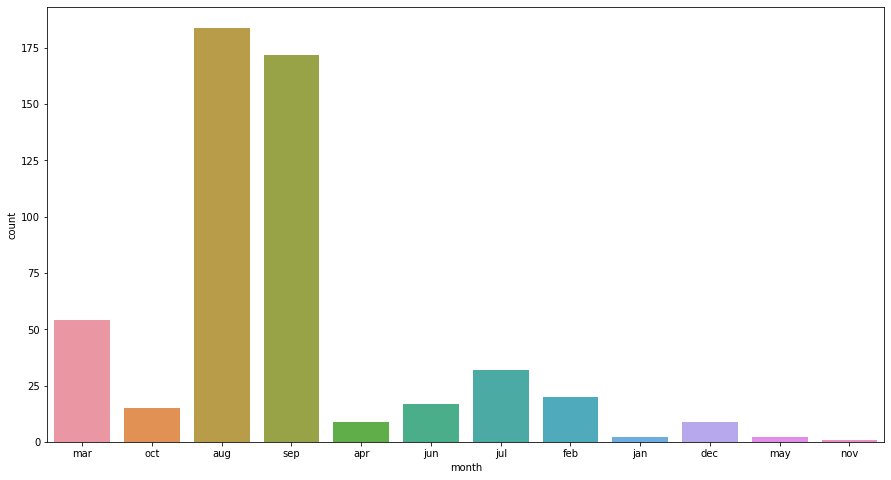

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.countplot('month',data=df)
plt.show()

C:\Users\Sandy_Marcus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


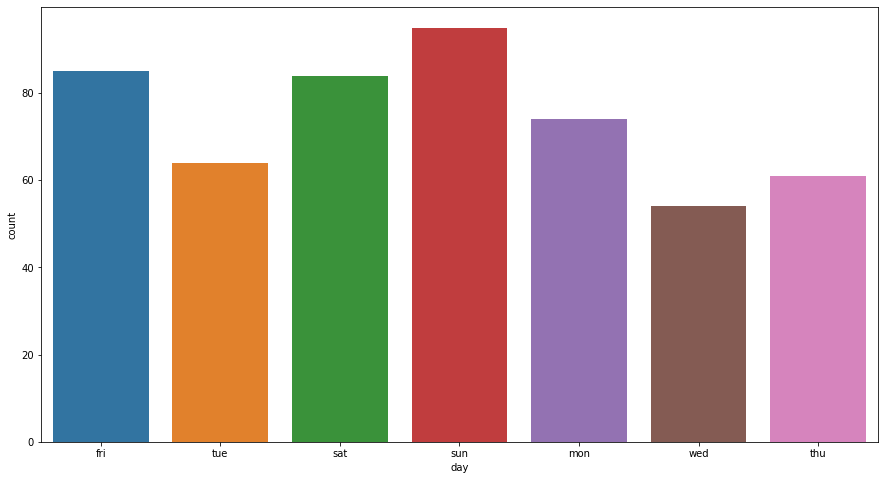

In [8]:
plt.figure(figsize=(15,8))
sns.countplot('day',data=df)
plt.show()

C:\Users\Sandy_Marcus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


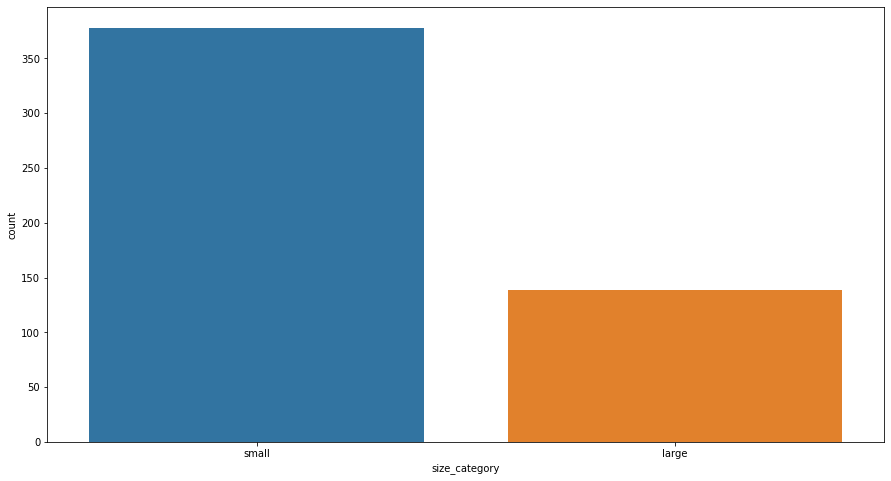

In [9]:
plt.figure(figsize=(15,8))
sns.countplot('size_category',data=df)
plt.show()

In [10]:
df1=df.copy()

In [11]:
df1.drop('month',axis=1,inplace=True)

In [12]:
df1.drop('day',axis=1,inplace=True)

In [13]:
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [14]:
df1.size_category.replace(('small','large'),(0,1),inplace=True)

In [15]:
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
df1.dtypes

FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category      int64
dtype: object

In [17]:
df1.shape

(517, 29)

In [18]:
seed=27
numpy.random.seed(seed)

X=df1.iloc[:,0:28]

Y=df1.iloc[:,28:]


# Create your first MLP in Keras

In [19]:
#Creat a model

model=Sequential()
model.add(Dense(12,input_dim=28,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
# Compile the Model

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [21]:
#Fitted the values to model

model.fit(X,Y,validation_split=0.33,epochs=200,batch_size=20)

Epoch 1/200
18/18 [==============================] - 6s 240ms/step - loss: 16.3924 - accuracy: 0.7642 - val_loss: 12.5781 - val_accuracy: 0.6784
Epoch 2/200
18/18 [==============================] - 0s 10ms/step - loss: 7.6031 - accuracy: 0.7725 - val_loss: 4.2478 - val_accuracy: 0.6784
Epoch 3/200
18/18 [==============================] - 0s 12ms/step - loss: 2.6407 - accuracy: 0.7765 - val_loss: 1.9658 - val_accuracy: 0.6784
Epoch 4/200
18/18 [==============================] - 0s 10ms/step - loss: 1.0977 - accuracy: 0.7554 - val_loss: 1.4162 - val_accuracy: 0.6725
Epoch 5/200
18/18 [==============================] - 0s 8ms/step - loss: 0.8428 - accuracy: 0.7512 - val_loss: 1.2344 - val_accuracy: 0.6725
Epoch 6/200
18/18 [==============================] - 0s 8ms/step - loss: 0.6743 - accuracy: 0.7741 - val_loss: 1.1369 - val_accuracy: 0.6725
Epoch 7/200
18/18 [==============================] - 0s 25ms/step - loss: 1.0847 - accuracy: 0.7665 - val_loss: 1.0689 - val_accuracy: 0.6725
Epoch

18/18 [==============================] - 0s 9ms/step - loss: 0.0290 - accuracy: 0.9980 - val_loss: 0.0910 - val_accuracy: 0.9532
Epoch 116/200
18/18 [==============================] - 0s 8ms/step - loss: 0.0294 - accuracy: 0.9948 - val_loss: 0.1051 - val_accuracy: 0.9532
Epoch 117/200
18/18 [==============================] - 0s 8ms/step - loss: 0.0264 - accuracy: 0.9932 - val_loss: 0.0908 - val_accuracy: 0.9474
Epoch 118/200
18/18 [==============================] - 0s 8ms/step - loss: 0.0198 - accuracy: 0.9965 - val_loss: 0.0905 - val_accuracy: 0.9532
Epoch 119/200
18/18 [==============================] - 0s 8ms/step - loss: 0.0247 - accuracy: 0.9975 - val_loss: 0.0905 - val_accuracy: 0.9532
Epoch 120/200
18/18 [==============================] - 0s 9ms/step - loss: 0.0270 - accuracy: 0.9944 - val_loss: 0.0969 - val_accuracy: 0.9532
Epoch 121/200
18/18 [==============================] - 0s 12ms/step - loss: 0.0403 - accuracy: 0.9861 - val_loss: 0.0872 - val_accuracy: 0.9532
Epoch 122/20

In [1]:
# Checkeing Accuracy of the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

NameError: name 'model' is not defined

# Tuning of Hyperparameters :- Batch Size and Epochs

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
# importing teh necessary packages

from sklearn.model_selection import GridSearchCV,KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [25]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [26]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=   2.3s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=   2.3s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=   2.6s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=   2.3s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=   2.3s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..................batch_size=10

[CV 2/5; 8/9] END ..................batch_size=40, epochs=50; total time=   2.5s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................
[CV 3/5; 8/9] END ..................batch_size=40, epochs=50; total time=   3.0s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................
[CV 4/5; 8/9] END ..................batch_size=40, epochs=50; total time=   3.4s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................
[CV 5/5; 8/9] END ..................batch_size=40, epochs=50; total time=   2.7s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................
[CV 1/5; 9/9] END .................batch_size=40, epochs=100; total time=   4.2s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................
[CV 2/5; 9/9] END .................batch_size=40, epochs=100; total time=   5.0s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................
[CV 3/5; 9/9] END ..........

In [27]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9728528738021851, using {'batch_size': 20, 'epochs': 100}
0.918932032585144,0.09595946716020416 with: {'batch_size': 10, 'epochs': 10}
0.968988049030304,0.020737747497568293 with: {'batch_size': 10, 'epochs': 50}
0.8893390655517578,0.15566712605505306 with: {'batch_size': 10, 'epochs': 100}
0.8524645328521728,0.17993129763467905 with: {'batch_size': 20, 'epochs': 10}
0.9496452450752259,0.025525425435189007 with: {'batch_size': 20, 'epochs': 50}
0.9728528738021851,0.02410859305166114 with: {'batch_size': 20, 'epochs': 100}
0.8799290537834168,0.07261688881901115 with: {'batch_size': 40, 'epochs': 10}
0.9362210631370544,0.05358776959723822 with: {'batch_size': 40, 'epochs': 50}
0.9555638432502747,0.040615254972396576 with: {'batch_size': 40, 'epochs': 100}


# Tuning of Hyperparameters:- Learning rate and Drop out rate

In [28]:
from keras.layers import Dropout

# Define the Model

def create_model(learning_rate,dropout_rate):
    model=Sequential()
    model.add(Dense(8,input_dim=28,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim=28,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(dropout_rate))
    adam=Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=adam)
    return model

In [29]:
#Create model
model=KerasClassifier(build_fn=create_model,verbose=0,epochs=10,batch_size=10)

#define grid search paprameters

learning_rate=[0.001,0.01,0.1]
dropout_rate=[0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grid=dict(learning_rate=learning_rate,dropout_rate=dropout_rate)

#Build and fit the model
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   2.4s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   2.4s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   2.7s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   2.6s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   2.6s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 2/9] END ......dropout_rate=0.0, learnin

In [30]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.734466016292572, using {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.28730395510792733,0.24202503774345036 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.40388349890708924,0.39387333969644495 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.6587378680706024,0.22758449693740784 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.22302091419696807,0.17819299864454155 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.734466016292572,0.14927165082495514 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.3898058295249939,0.3978438954089778 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.32994772456586363,0.35225475769109643 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.3805825233459473,0.31659418525028876 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.24466019868850708,0.3046997385738131 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


# Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [31]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform; total time=   2.2s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform; total time=   2.5s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform; total time=   2.0s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform; total time=   2.0s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform; total time=   2.8s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................
[CV 1/5; 2/12] END .activation_function=softmax,

[CV 2/5; 3/12] END ...activation_function=softmax, init=zero; total time=   2.4s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................
[CV 3/5; 3/12] END ...activation_function=softmax, init=zero; total time=   2.1s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................
[CV 4/5; 3/12] END ...activation_function=softmax, init=zero; total time=   2.0s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................
[CV 5/5; 3/12] END ...activation_function=softmax, init=zero; total time=   2.0s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................
[CV 1/5; 4/12] END ...activation_function=relu, init=uniform; total time=   2.5s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................
[CV 2/5; 4/12] END ...activation_function=relu, init=uniform; total time=   2.0s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................
[CV 3/5; 4/12] END ...activa

[CV 2/5; 5/12] END ....activation_function=relu, init=normal; total time=   2.0s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................
[CV 3/5; 5/12] END ....activation_function=relu, init=normal; total time=   1.9s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................
[CV 4/5; 5/12] END ....activation_function=relu, init=normal; total time=   2.5s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................
[CV 5/5; 5/12] END ....activation_function=relu, init=normal; total time=   1.9s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................
[CV 1/5; 6/12] END ......activation_function=relu, init=zero; total time=   2.0s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................
[CV 2/5; 6/12] END ......activation_function=relu, init=zero; total time=   2.3s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................
[CV 3/5; 6/12] END ......act

[CV 1/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   2.4s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................
[CV 2/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   2.4s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................
[CV 3/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   2.7s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................
[CV 4/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   2.3s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................
[CV 5/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   2.5s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................
[CV 1/5; 8/12] END ....activation_function=tanh, init=normal; total time=   2.5s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................
[CV 2/5; 8/12] END ....activ

[CV 1/5; 9/12] END ......activation_function=tanh, init=zero; total time=   1.9s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................
[CV 2/5; 9/12] END ......activation_function=tanh, init=zero; total time=   2.3s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................
[CV 3/5; 9/12] END ......activation_function=tanh, init=zero; total time=   2.0s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................
[CV 4/5; 9/12] END ......activation_function=tanh, init=zero; total time=   2.0s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................
[CV 5/5; 9/12] END ......activation_function=tanh, init=zero; total time=   2.0s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................
[CV 1/5; 10/12] END activation_function=linear, init=uniform; total time=   2.4s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................
[CV 2/5; 10/12] END activati

[CV 5/5; 10/12] END activation_function=linear, init=uniform; total time=   2.4s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END .activation_function=linear, init=normal; total time=   1.9s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END .activation_function=linear, init=normal; total time=   1.9s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END .activation_function=linear, init=normal; total time=   1.9s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................
[CV 4/5; 11/12] END .activation_function=linear, init=normal; total time=   2.4s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................
[CV 5/5; 11/12] END .activation_function=linear, init=normal; total time=   2.0s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................
[CV 1/5; 12/12] END ...activ

[CV 5/5; 12/12] END ...activation_function=linear, init=zero; total time=   1.9s


In [32]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.809988796710968, using {'activation_function': 'linear', 'init': 'normal'}
0.6538834929466247,0.25554276084803557 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.695631068944931,0.25443376870139484 with: {'activation_function': 'softmax', 'init': 'normal'}
0.6597087383270264,0.25727422387066334 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7364077568054199,0.15359763543603858 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7383495092391967,0.15354239422184465 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.7558252453804016,0.15081079750901752 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.7946601986885071,0.11750782007253545 with: {'activatio

# Tuning of Hyperparameter :-Number of Neurons in activation layer

In [33]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   2.0s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   2.0s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   2.0s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   2.4s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   2.0s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END ......................neuron1=4

[CV 5/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   2.0s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................
[CV 1/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   2.4s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................
[CV 2/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   2.0s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................
[CV 3/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   2.1s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................
[CV 4/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   2.0s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................
[CV 5/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   2.5s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................
[CV 1/5; 4/9] END ..........

[CV 4/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   2.4s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................
[CV 5/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   1.9s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................
[CV 1/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   1.9s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................
[CV 2/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   2.3s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................
[CV 3/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   2.0s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................
[CV 4/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   2.0s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................
[CV 5/5; 5/9] END ..........

[CV 4/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   2.0s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................
[CV 5/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   2.7s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................
[CV 1/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   2.2s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................
[CV 2/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   2.1s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................
[CV 3/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   2.4s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................
[CV 4/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   2.0s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................
[CV 5/5; 7/9] END ..........

[CV 3/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   2.0s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................
[CV 4/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   2.2s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................
[CV 5/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   2.6s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................
[CV 1/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   2.9s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................
[CV 2/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   2.2s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................
[CV 3/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   2.3s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................
[CV 4/5; 9/9] END ..........

In [34]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8779312968254089, using {'neuron1': 16, 'neuron2': 8}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 8}
0.7383495211601258,0.1525569895928302 with: {'neuron1': 8, 'neuron2': 2}
0.765533983707428,0.15678635085874149 with: {'neuron1': 8, 'neuron2': 4}
0.7538088202476502,0.15330427569533822 with: {'neuron1': 8, 'neuron2': 8}
0.7402912616729737,0.15086078610924789 with: {'neuron1': 16, 'neuron2': 2}
0.7383495092391967,0.15292726101196705 with: {'neuron1': 16, 'neuron2': 4}
0.8779312968254089,0.08316002865837802 with: {'neuron1': 16, 'neuron2': 8}


# Training model with optimum values of Hyperparameters

In [36]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 60,epochs = 20)

# Fitting the model

model.fit(X,Y)

# Predicting using trained model

y_predict = model.predict(X)

# Printing the metrics
print(accuracy_score(Y,y_predict))

0.965183752417795


# Hyperparameters all at once

In [ ]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)



In [37]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8779312968254089, using {'neuron1': 16, 'neuron2': 8}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 8}
0.7383495211601258,0.1525569895928302 with: {'neuron1': 8, 'neuron2': 2}
0.765533983707428,0.15678635085874149 with: {'neuron1': 8, 'neuron2': 4}
0.7538088202476502,0.15330427569533822 with: {'neuron1': 8, 'neuron2': 8}
0.7402912616729737,0.15086078610924789 with: {'neuron1': 16, 'neuron2': 2}
0.7383495092391967,0.15292726101196705 with: {'neuron1': 16, 'neuron2': 4}
0.8779312968254089,0.08316002865837802 with: {'neuron1': 16, 'neuron2': 8}
